In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'BHP.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.shape

(13320, 9)

In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df1=df.drop(columns=['society','availability'])
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df2=df1.dropna()
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [11]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
df2['Size']=df2['size'].str.extract('(\d)').astype(object)
df2['Size'].head()

0    2
1    4
2    3
3    3
4    2
Name: Size, dtype: object

In [13]:
df2=df2.drop(columns=['size','total_sqft'])
df2.head()

,area_type,location,bath,balcony,price,Size
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2


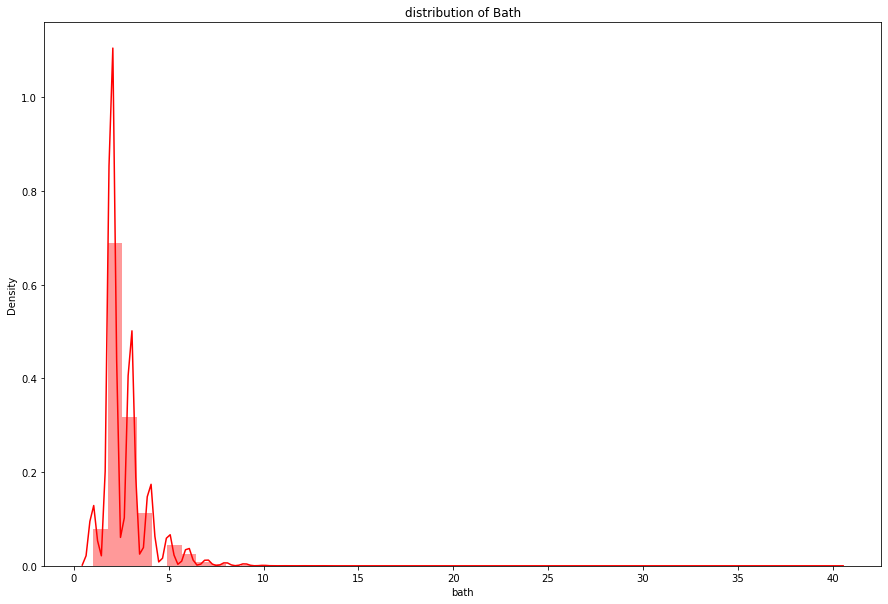

In [41]:
#distribution of bath
plt.figure(figsize=(15,10))
plt.title('distribution of Bath')
sns.distplot(df2['bath'],color="r");

<AxesSubplot:xlabel='balcony', ylabel='count'>

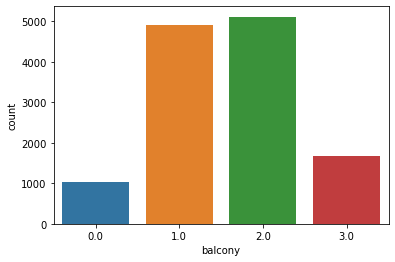

In [20]:
sns.countplot(x='balcony', data=df2)

<AxesSubplot:xlabel='Size', ylabel='count'>

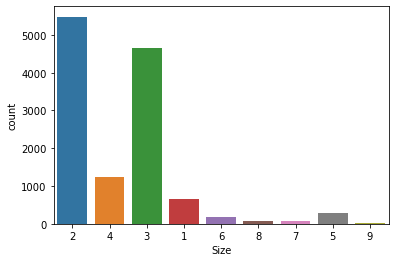

In [21]:
sns.countplot(x='Size', data=df2)

In [15]:
df2.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [16]:
df2.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [17]:
df2.Size.unique()

array(['2', '4', '3', '1', '6', '8', '7', '5', '9'], dtype=object)

In [22]:
# Identifying target variable
X = df2.drop('price', axis=1)
y = df2['price']

In [23]:
#splitting data into test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=7)

In [24]:
# Categorical features of train data
X_train_cat=X_train[['area_type','location']]
X_train_cat

,area_type,location
5595,Super built-up Area,Rajaji Nagar
5778,Super built-up Area,Hebbal
4601,Plot Area,Judicial Layout
9566,Super built-up Area,Bhoganhalli
6759,Super built-up Area,KR Puram
...,...,...
5999,Super built-up Area,Begur Road
11272,Built-up Area,Sidedahalli
562,Built-up Area,Ittamadu
9890,Super built-up Area,Panathur


In [25]:
# Categorical features of test data
X_test_cat=X_test[['area_type','location']]
X_test_cat

,area_type,location
6933,Super built-up Area,Uttarahalli
6677,Super built-up Area,Whitefield
7746,Super built-up Area,8th Phase JP Nagar
12559,Super built-up Area,HSR Layout
7620,Plot Area,Banjara Layout
...,...,...
2741,Built-up Area,Chinnapanahalli
12414,Plot Area,Hoskote
9697,Super built-up Area,Thigalarapalya
1689,Super built-up Area,Hebbal


In [26]:
# Numerical features of train data
X_train_num=X_train.drop(columns=['area_type','location'])
X_train_num

,bath,balcony,Size
5595,2.0,2.0,2
5778,2.0,1.0,2
4601,6.0,2.0,6
9566,3.0,1.0,3
6759,2.0,2.0,2
...,...,...,...
5999,2.0,2.0,3
11272,2.0,0.0,2
562,2.0,2.0,2
9890,2.0,1.0,2


In [27]:
# Numerical features of test data
X_test_num=X_test.drop(columns=['area_type','location'])
X_test_num

,bath,balcony,Size
6933,2.0,2.0,3
6677,3.0,2.0,3
7746,2.0,3.0,2
12559,3.0,1.0,3
7620,2.0,2.0,2
...,...,...,...
2741,2.0,2.0,2
12414,4.0,2.0,4
9697,4.0,2.0,3
1689,2.0,1.0,2


In [28]:
## Categorical Feature - Encoding using OneHotEncoder
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

# Creating object of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown = 'ignore')

## Numerical Feature - Rescaling using Normalization
# scaling the numerical features
from sklearn.preprocessing import MinMaxScaler

# Creating object of MinMaxScaler class
scaler = MinMaxScaler()

## Data Preprocessing on X_train

In [29]:
# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed_cat = pd.DataFrame(encoder.fit_transform(X_train_cat), columns=encoder.get_feature_names_out(X_train_cat.columns), 
index = X_train_cat.index)

X_train_transformed_cat.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,...,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,location_whitefiled
5595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_transformed_num = pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns, 
index = X_train_num.index)

X_train_transformed_num.head()

,bath,balcony,Size
5595,0.025641,0.666667,0.125
5778,0.025641,0.333333,0.125
4601,0.128205,0.666667,0.625
9566,0.051282,0.333333,0.250
6759,0.025641,0.666667,0.125


## Data Preprocessing on X_test.

In [31]:
# Categorical Features
# Use the same 'encoder' object to transform test data
X_test_transformed_cat = pd.DataFrame(encoder.transform(X_test_cat), columns = encoder.get_feature_names_out(X_train_cat.columns), 
index = X_test_cat.index)

X_test_transformed_cat.head()

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,...,"location_ravindra nagar, T.dasarahalli peenya",location_rr nagar,location_sankeswari,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,location_whitefiled
6933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6677,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12559,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Numerical Features
# Use the same 'scaler' object to transform test data
X_test_transformed_num = pd.DataFrame(scaler.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)

X_test_transformed_num.head()

,bath,balcony,Size
6933,0.025641,0.666667,0.250
6677,0.051282,0.666667,0.250
7746,0.025641,1.000000,0.125
12559,0.051282,0.333333,0.250
7620,0.025641,0.666667,0.125


In [33]:
X_train_transformed=pd.concat([X_train_transformed_cat, X_train_transformed_num], axis=1)
X_train_transformed

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,...,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,location_whitefiled,bath,balcony,Size
5595,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.125
5778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.333333,0.125
4601,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.128205,0.666667,0.625
9566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.333333,0.250
6759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.250
11272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.000000,0.125
562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.125
9890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.333333,0.125


In [34]:
X_test_transformed=pd.concat([X_test_transformed_cat, X_test_transformed_num], axis=1)
X_test_transformed

,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,...,location_sapthagiri Layout,location_sarjapura main road,location_singapura paradise,location_t.c palya,location_tc.palya,location_vinayakanagar,location_whitefiled,bath,balcony,Size
6933,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.250
6677,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.666667,0.250
7746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,1.000000,0.125
12559,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051282,0.333333,0.250
7620,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.666667,0.125
12414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.666667,0.375
9697,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.666667,0.250
1689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.333333,0.125


## Training

In [35]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
RandomForest= RandomForestRegressor(n_estimators=100, random_state=42)
RandomForest.fit(X_train_transformed, y_train)


RandomForestRegressor(random_state=42)

In [36]:
# Model Prediction
y_pred = RandomForest.predict(X_test_transformed)

In [37]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 13516.574394968462
R-squared Score: 0.3647801775695163


In [39]:
# Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
model = LinearRegression()
model.fit(X_train_transformed, y_train)

# Model Prediction
y_pred = model.predict(X_test_transformed)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 13430.45838339809
R-squared Score: 0.36882725310653364
